# Visulaizations and Plots in Time Series Analysis

In [24]:
import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Dataset


In [51]:
# importing from kaggle
df = pd.read_csv('/kaggle/input/time-series-datasets/Electric_Production.csv')

In [52]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [55]:
df['Year'] = df['DATE'].apply(lambda x: x[-4:])
df[['DATE', 'Year']]

,DATE,Year
0,1/1/1985,1985
1,2/1/1985,1985
2,3/1/1985,1985
3,4/1/1985,1985
4,5/1/1985,1985
...,...,...
392,9/1/2017,2017
393,10/1/2017,2017
394,11/1/2017,2017
395,12/1/2017,2017


In [56]:
df1 = pd.DataFrame(df[df['Year'] == '1985'])
df1


,DATE,IPG2211A2N,Year
0,1/1/1985,72.5052,1985
1,2/1/1985,70.6720,1985
2,3/1/1985,62.4502,1985
3,4/1/1985,57.4714,1985
4,5/1/1985,55.3151,1985
5,6/1/1985,58.0904,1985
6,7/1/1985,62.6202,1985
7,8/1/1985,63.2485,1985
8,9/1/1985,60.5846,1985
9,10/1/1985,56.3154,1985


In [58]:
class WaterfallChart:
    def __init__(self, df: pd.DataFrame, x: str, y: str, text = None):
        self.df = df
        self.x = x
        self.y = y
        self.text = text
    
    def _delta(self):
        vals = self.df[self.y].to_list()
        new = [vals[0]]
        for i in range(1, len(vals)):
            new.append(vals[i] - vals[i-1])
        return new
    
    def saveplot(self, title, delta = False):
        x = self.df[self.x]
        if delta:
            y = self._delta()
        else:
            y = self.df[self.y]
        measure = ["absolute"] + ["relative"] * (len(self.df)-2)+["total"]
        if self.text is None:
            fig = go.Figure(go.Waterfall(x = x, measure = measure, y = y))
        else:
            measure = ["absolute"] + ["relative"] * (len(self.df)-2)+["total"]
            fig = go.Figure(go.Waterfall(x = x, measure = measure, y = y, text = self.text))
        y_list = y.to_list()
        if y_list[0] > 0:
            color_labels = ['i']
        else:
            color_labels = ['d']
        for i in range (1, len(y_list)):
            if y_list[i] > y_list[i-1]:
                color_labels.append('i')
            else:
                color_labels.append('d')
        i_list = [y_list[0]]
        d_list = []
        for i in range(len(color_labels)):
            if i:
                if color_labels[i] == 'i':
                    i_list.append(y_list[i]-y_list[i-1])
                    d_list.append('-')
                else:
                    i_list.append('-')
                    d_list.append(y_list[i-1] - y_list[i])
            else:
                i_list.append(y_list[i])
                d_list.append('-')
#         fig.update_layout(title = title, xshowlegend = False)
#         plotly.offline.plot(fig, filename='/kaggle/working/' + filename + '.html')
        obj = {
            "n": len(self.df[self.x]),
            "x": self.df[self.x].to_list(),
            "y": y_list,
            "i": i_list,
            "d": d_list,
            "t": title
        }
        return obj, color_labels
        
    # def summary(self):
        
        
        
        

In [61]:
wp = WaterfallChart(df1, 'DATE', 'IPG2211A2N')

In [62]:
wp.saveplot(title = 'IPG2211A2N')

({'n': 12,
  'x': ['1/1/1985',
   '2/1/1985',
   '3/1/1985',
   '4/1/1985',
   '5/1/1985',
   '6/1/1985',
   '7/1/1985',
   '8/1/1985',
   '9/1/1985',
   '10/1/1985',
   '11/1/1985',
   '12/1/1985'],
  'y': [72.5052,
   70.672,
   62.4502,
   57.4714,
   55.3151,
   58.0904,
   62.6202,
   63.2485,
   60.5846,
   56.3154,
   58.0005,
   68.7145],
  'i': [72.5052,
   72.5052,
   '-',
   '-',
   '-',
   '-',
   2.7753000000000014,
   4.5297999999999945,
   0.628300000000003,
   '-',
   '-',
   1.6851000000000056,
   10.713999999999999],
  'd': ['-',
   1.833200000000005,
   8.221799999999995,
   4.9788,
   2.1563000000000017,
   '-',
   '-',
   '-',
   2.663899999999998,
   4.269200000000005,
   '-',
   '-'],
  't': 'IPG2211A2N'},
 ['i', 'd', 'd', 'd', 'd', 'i', 'i', 'i', 'd', 'd', 'i', 'i'])

In [ ]:
# summary/explanations

## Gantt chart

In [ ]:
df = pd.read_csv('data/schedule.csv')
df

In [ ]:
class GanttChart:
    def __init__(self, df, task, x_start, x_end, hue = None):
        self.df =df
        self.task = task
        self.x_start = x_start
        self.x_end = x_end
        self.hue = hue
    
    def saveplot(self, title, filename):
        if self.hue is not None:
            fig = px.timeline(self.df, x_start = self.x_start, x_end = self.x_end, y = self.task, color = self.hue)
        else:
            fig = px.timeline(self.df, x_start = self.x_start, x_end = self.x_end, y = self.task)
        fig.update_layout(title = title, showlegend = True)
        fig.update_yaxes(autorange="reversed")
        plotly.offline.plot(fig, filename = 'plots/' + filename + '.html')
        
    # def summart(self):

In [ ]:
chart = GanttChart(df, 'Task', 'Start', 'Finish', 'Category')
chart.saveplot(title = 'My Timetable', filename = 'gantt')

## Stacked Area Chart

In [77]:
df = pd.read_csv('/kaggle/input/time-series-practice-dataset/train.csv')
df.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [78]:
df["Year"] = df['Date'].apply(lambda x: x[:4])
df["Month"] = df['Date'].apply(lambda x: x[5:7])
df["Day"] = df['Date'].apply(lambda x: x[8:])
df1 = pd.DataFrame(df[df['Year'] == '2010'])
df = pd.DataFrame(df1[df1['Month'] == '01'])
df

,Date,store,product,number_sold,Year,Month,Day
0,2010-01-01,0,0,801,2010,01,01
1,2010-01-02,0,0,810,2010,01,02
2,2010-01-03,0,0,818,2010,01,03
3,2010-01-04,0,0,796,2010,01,04
4,2010-01-05,0,0,808,2010,01,05
...,...,...,...,...,...,...,...
226829,2010-01-27,6,9,856,2010,01,27
226830,2010-01-28,6,9,849,2010,01,28
226831,2010-01-29,6,9,866,2010,01,29
226832,2010-01-30,6,9,884,2010,01,30


In [80]:

df = pd.DataFrame(df[df['store'] == 0])
df

,Date,store,product,number_sold,Year,Month,Day
0,2010-01-01,0,0,801,2010,01,01
1,2010-01-02,0,0,810,2010,01,02
2,2010-01-03,0,0,818,2010,01,03
3,2010-01-04,0,0,796,2010,01,04
4,2010-01-05,0,0,808,2010,01,05
...,...,...,...,...,...,...,...
29609,2010-01-27,0,9,790,2010,01,27
29610,2010-01-28,0,9,787,2010,01,28
29611,2010-01-29,0,9,780,2010,01,29
29612,2010-01-30,0,9,782,2010,01,30


In [81]:
class StackedAreaChart:
    def __init__(self, df, trace, x, y):
        self.df = df
        self.trace = trace
        self.x = x
        self.y = y
    
    def saveplot(self, title, filename):
        fig = go.Figure()
        traces = list(self.df[self.trace].unique())
        y_vals = []
        names = []
        for trace in traces:
            df = pd.DataFrame(self.df[self.df[self.trace] == trace])
            name = self.trace + ' ' + str(trace)
            names.append(name)
            y_vals.append(df[self.y].to_list())
            x = df[self.x].to_list()
        obj = {
            "trace": traces,
            "x": x,
            "y": y_vals,
            "names": names,
            
        }
        return obj
#         fig.update_layout(title = title)
#         plotly.offline.plot(fig, filename = 'plots/' + filename +'.html')
    
    # def summary(self):

In [82]:
sac = StackedAreaChart(df, 'product', 'Day', 'number_sold')
x = sac.saveplot('Number of products sold in January 2010', 'stackedarea')

In [83]:
for y in x['y']:
    print(y, end = '\n')

[801, 810, 818, 796, 808, 812, 830, 812, 817, 832, 834, 826, 822, 811, 836, 841, 818, 827, 822, 817, 834, 825, 821, 840, 812, 835, 833, 833, 833, 840, 826]
[851, 843, 847, 855, 866, 873, 852, 851, 838, 819, 859, 878, 869, 855, 854, 838, 849, 851, 852, 866, 884, 868, 846, 857, 862, 852, 866, 841, 840, 846, 841]
[893, 871, 862, 887, 891, 903, 891, 881, 880, 892, 881, 876, 892, 898, 869, 845, 873, 888, 891, 878, 879, 847, 885, 856, 881, 872, 867, 878, 854, 862, 856]
[802, 804, 791, 799, 812, 822, 806, 796, 791, 803, 804, 808, 794, 785, 807, 790, 806, 800, 801, 811, 792, 790, 792, 788, 782, 788, 810, 794, 761, 794, 768]
[938, 926, 942, 941, 963, 966, 933, 926, 932, 918, 944, 969, 965, 958, 917, 922, 927, 940, 967, 966, 938, 937, 927, 914, 932, 956, 946, 950, 928, 912, 918]
[881, 859, 870, 878, 879, 896, 872, 880, 874, 882, 890, 871, 871, 885, 874, 877, 853, 869, 884, 889, 878, 875, 879, 875, 861, 884, 874, 866, 880, 879, 881]
[895, 879, 864, 881, 892, 896, 884, 881, 887, 872, 882, 886, 882

In [84]:
x['x']

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

## Lag plot

In [144]:
class LagPlot:
    def __init__(self, df, val):
        self.df = df
        self.val = val
    
    def saveplot(self, filename, lag = 1):
        fig, ax = plt.subplots(figsize = (12,7))
        x_vals = self.df[self.val].to_list()
        y_vals = []
        for i in range(lag, len(x_vals)):
            y_vals.append(x_vals[i])
        x_vals = x_vals[:-lag]
        print(len(x_vals), len(y_vals))
        points = []
        for i in range(len(x_vals)):
            points.append([x_vals[i], y_vals[i]])
        return {
            "points": points,
            "title": filename
        }
        
    # def summary(self):

In [145]:
df = pd.read_csv('/kaggle/input/time-series-practice-dataset/train.csv')
df.head()
df["Year"] = df['Date'].apply(lambda x: x[:4])
df["Month"] = df['Date'].apply(lambda x: x[5:7])
df["Day"] = df['Date'].apply(lambda x: x[8:])
df1 = pd.DataFrame(df[df['Year'] == '2010'])
df = pd.DataFrame(df1[df1['product'] == 0])

2535 2535


{'points': [[801, 834],
  [810, 825],
  [818, 821],
  [796, 840],
  [808, 812],
  [812, 835],
  [830, 833],
  [812, 833],
  [817, 833],
  [832, 840],
  [834, 826],
  [826, 835],
  [822, 822],
  [811, 833],
  [836, 835],
  [841, 843],
  [818, 833],
  [827, 839],
  [822, 839],
  [817, 855],
  [834, 840],
  [825, 849],
  [821, 845],
  [840, 861],
  [812, 853],
  [835, 844],
  [833, 842],
  [833, 846],
  [833, 843],
  [840, 843],
  [826, 849],
  [835, 858],
  [822, 870],
  [833, 855],
  [835, 837],
  [843, 856],
  [833, 846],
  [839, 853],
  [839, 860],
  [855, 848],
  [840, 861],
  [849, 848],
  [845, 868],
  [861, 861],
  [853, 846],
  [844, 868],
  [842, 850],
  [846, 879],
  [843, 876],
  [843, 846],
  [849, 864],
  [858, 860],
  [870, 867],
  [855, 867],
  [837, 871],
  [856, 872],
  [846, 857],
  [853, 872],
  [860, 860],
  [848, 873],
  [861, 866],
  [848, 875],
  [868, 874],
  [861, 870],
  [846, 864],
  [868, 854],
  [850, 883],
  [879, 862],
  [876, 866],
  [846, 875],
  [864, 85

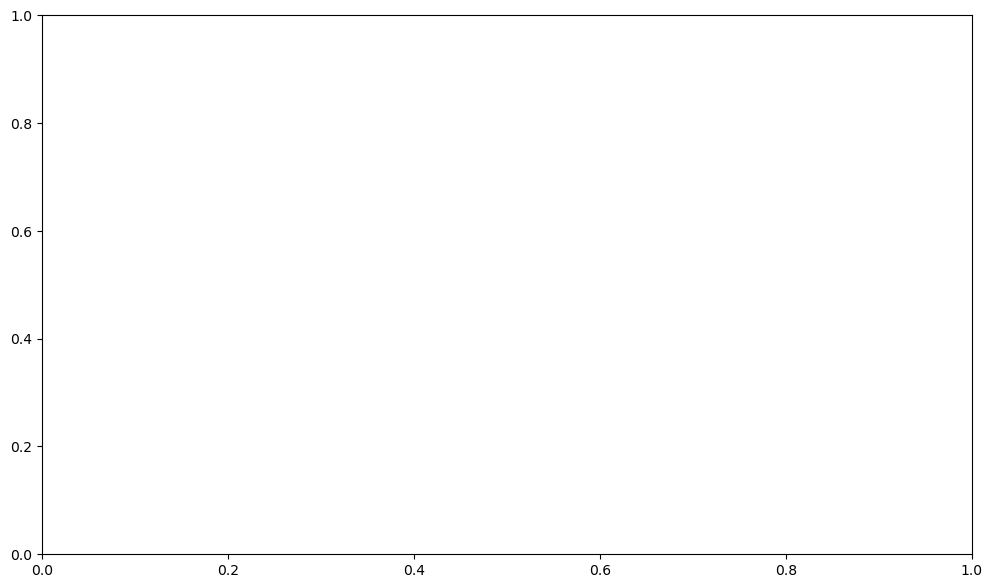

In [146]:
lp = LagPlot(df, 'number_sold')
lp.saveplot('lagplot', lag =20)